In [3]:
import numpy as np
from functions import portfolio_metrics

def simulate_portfolios(mean_returns, cov_matrix, num_portfolios=10000, risk_free_rate=0.0):
    """
    Simulate random portfolios and compute metrics.

    Parameters:
    mean_returns (np.ndarray): expected returns
    cov_matrix (np.ndarray): covariance matrix
    num_portfolios (int): number of random portfolios
    risk_free_rate (float): risk-free rate

    Returns:
    dict: {
        "returns": np.ndarray of expected returns,
        "volatilities": np.ndarray of volatilities,
        "sharpe_ratios": np.ndarray of Sharpe ratios,
        "max_sharpe": dict of portfolio metrics with max Sharpe ratio
    }
    """
    # 1. Initialize arrays to store returns, volatilities, and Sharpe ratios
    
    n_assets = len(mean_returns)
    
    returns = np.zeros(num_portfolios)
    volatilities = np.zeros(num_portfolios)
    sharpe_ratios = np.zeros(num_portfolios)
    

    # 2. Loop over num_portfolios:
    #    a. Generate random weights (normalize so sum=1)
    #    b. Compute portfolio metrics using portfolio_metrics()
    #    c. Store results in arrays
    
    for n in range(num_portfolios):
        
        weights = np.random.rand(n_assets)
        weights = weights / np.sum(weights)
        metrics = portfolio_metrics(weights, mean_returns, cov_matrix, risk_free_rate)
        
        returns[n] = metrics["expected_return"]
        volatilities[n] = metrics["volatility"]
        sharpe_ratios[n] = metrics["sharpe_ratio"]
        
    # 3. Identify portfolio with maximum Sharpe ratio
    
    max_index = np.argmax(sharpe_ratios)
    
    max_sharpe = {
        "expected_return": returns[max_index],
        "volatility": volatilities[max_index],
        "sharpe_ratio": sharpe_ratios[max_index]
    }

    # 4. Return arrays + max Sharpe portfolio metrics
    
    return {
        "returns": returns,
        "volatilities": volatilities,
        "sharpe_ratios": sharpe_ratios,
        "max_sharpe": max_sharpe
    }


In [4]:
import numpy as np

# Expected returns for 3 assets
mean_returns = np.array([0.10, 0.12, 0.14])

# Covariance matrix (3x3)
cov_matrix = np.array([
    [0.005, -0.010, 0.004],
    [-0.010, 0.040, -0.002],
    [0.004, -0.002, 0.023]
])

# Risk-free rate
risk_free_rate = 0.03

# Number of portfolios to simulate
num_portfolios = 10000

simulate_portfolios(mean_returns, cov_matrix, num_portfolios=10000, risk_free_rate=0.03)


{'returns': array([0.11815568, 0.11705155, 0.1182503 , ..., 0.12305521, 0.12730451,
        0.12298942]),
 'volatilities': array([0.07499715, 0.09141358, 0.09327174, ..., 0.09679544, 0.11058097,
        0.08553403]),
 'sharpe_ratios': array([1.17545384, 0.95228248, 0.94616328, ..., 0.96135943, 0.87993904,
        1.08716287]),
 'max_sharpe': {'expected_return': 0.10500532188406717,
  'volatility': 0.03945167104848499,
  'sharpe_ratio': 1.9011950543714042}}

In [6]:
import matplotlib.pyplot as plt

def plot_efficient_frontier(simulation_results):
    """
    Plot the efficient frontier from simulated portfolios.

    Parameters:
    simulation_results (dict): output of simulate_portfolios()

    Returns:
    None
    """
    # 1. Extract returns, volatilities, and Sharpe ratios
    returns = simulation_results["returns"]
    volatilities = simulation_results["volatilities"]
    sharpe_ratios = simulation_results["sharpe_ratios"]

    # 2. Create a scatter plot of portfolios
    #    X-axis: volatilities
    #    Y-axis: returns
    #    Color: Sharpe ratios
    plt.scatter(volatilities, returns, c = sharpe_ratios, cmap = "viridis", alpha = 0.5)

    # 3. Highlight the portfolio with maximum Sharpe ratio
    max_sharpe = simulation_results["max_sharpe"]
    max_return = max_sharpe["expected_return"]
    max_volatility = max_sharpe["volatility"]
    
    plt.scatter(max_volatility, max_return, color = "red", marker = "*", s = 200)

    # 4. Add labels, title, and colorbar
    
    plt.xlabel("Volatility")
    plt.ylabel("Expected return")
    plt.title("Efficient Frontier")
    plt.colorbar(label = "Sharpe ratio")

    # 5. Display the plot
    
    plt.show()


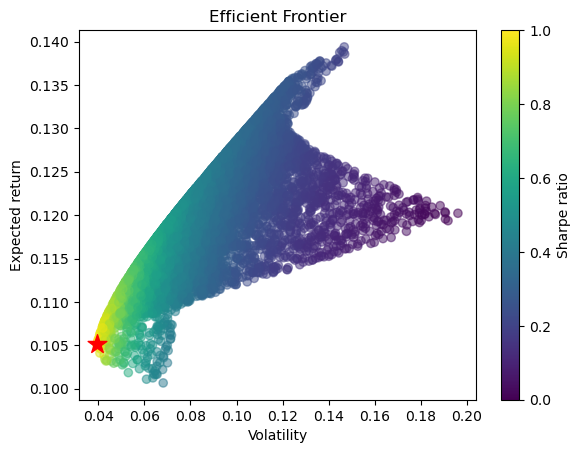

In [7]:
simulation_results = simulate_portfolios(mean_returns, cov_matrix, num_portfolios=10000, risk_free_rate=0.03)

plot_efficient_frontier(simulation_results)